HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

How will you help this NGO to make a correct decision based on socio-economic and health factors?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

## Preprocessing

### Outliers

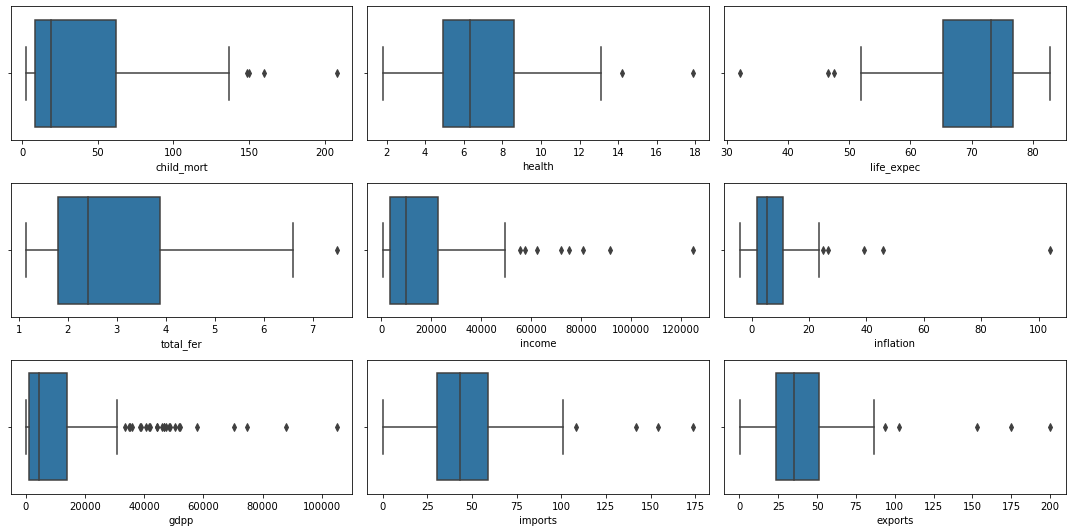

In [8]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])


plt.tight_layout()

### From the above plot it is evident that child_mort,health, life_expec,total_fer,income, inflation, gdpp, imports and exports should undergo outlier treatment.

### Removing outliers

In [9]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [10]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['child_mort', 'health','life_expec','total_fer','income','inflation','gdpp','imports','exports']:
    index_list.extend(outliers(data,feature))
index_list

[31,
 32,
 66,
 132,
 101,
 159,
 31,
 66,
 87,
 112,
 23,
 82,
 91,
 114,
 123,
 133,
 145,
 157,
 49,
 103,
 113,
 149,
 163,
 7,
 8,
 15,
 23,
 29,
 44,
 53,
 54,
 58,
 68,
 73,
 75,
 77,
 82,
 91,
 110,
 111,
 114,
 123,
 133,
 144,
 145,
 157,
 158,
 159,
 91,
 98,
 131,
 133,
 73,
 91,
 98,
 131,
 133]

In [11]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [12]:
data.shape

(167, 10)

In [13]:
data=remove(data,index_list)

In [14]:
data.shape

(128, 10)

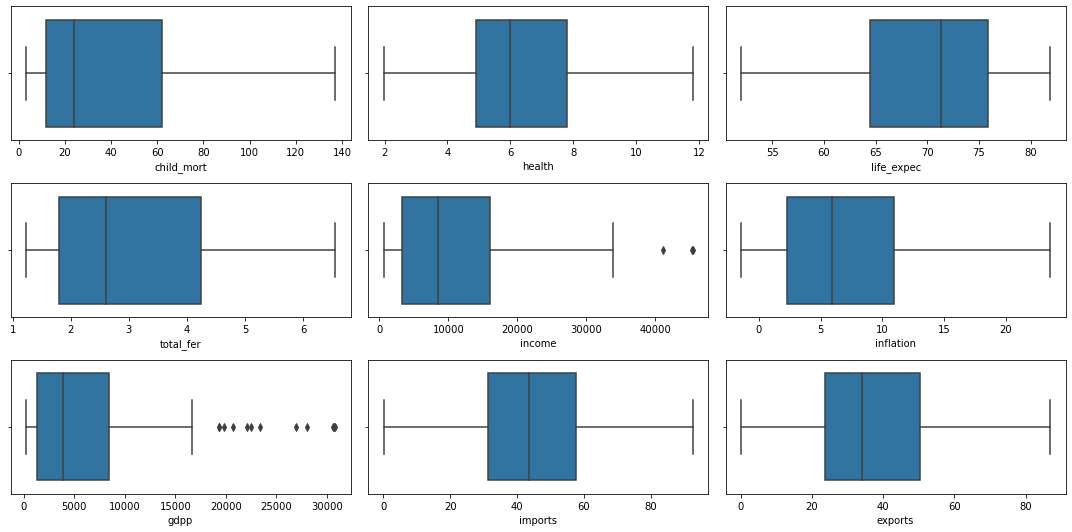

In [15]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])


plt.tight_layout()

### Plotting heatmap to understand the better correlation between variables

<AxesSubplot:>

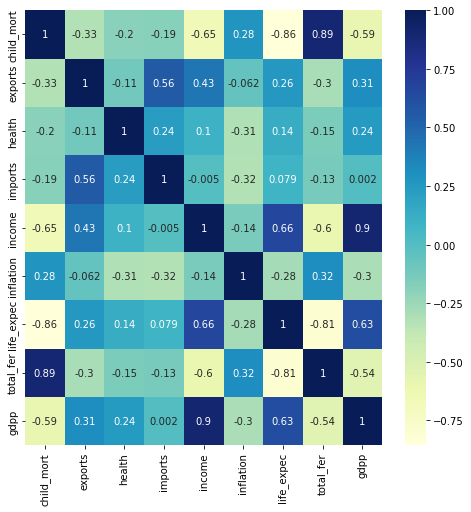

In [16]:
plt.figure(figsize = (8,8))  
sns.heatmap(data.corr(),annot = True,cmap="YlGnBu")

#### We can see that  some variables are highly positively and negatively correlation  such as between child_mort and total_fer, between income and gdpp, between child_mort and life_expec.

In [17]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Standard scaling

In [18]:
data_new = data.drop("country", axis=1)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_new = standard_scaler.fit_transform(data_new)

In [19]:
data_new = pd.DataFrame(data_new)
data_new.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
data_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561
1,-0.656174,-0.503559,0.092995,0.196191,-0.125286,-0.465551,0.895099,-0.938772,-0.328385
2,-0.339899,0.051955,-0.986655,-0.775465,0.179750,1.431138,0.922200,-0.089565,-0.276376
3,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101
4,-0.842392,0.431200,-0.142895,0.778055,0.816525,-0.963819,0.962853,-0.610047,0.811593


### PCA on the data 

In [20]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_new)

In [21]:
#List of PCA components.It would be the same as the number of variables
pca.components_

array([[-0.43903928,  0.23003049,  0.12597886,  0.12124919,  0.40836786,
        -0.19959414,  0.42633215, -0.42146374,  0.3971971 ],
       [ 0.06281361,  0.3405897 ,  0.30739824,  0.7298262 , -0.22379393,
        -0.38284228, -0.15186146,  0.07793467, -0.16469822],
       [ 0.01980308,  0.62207764, -0.61168522,  0.20145887,  0.13617362,
         0.41656727, -0.04490783,  0.03646846, -0.0496443 ],
       [ 0.32953214,  0.18544375,  0.35523949, -0.05945357,  0.43146995,
         0.11184636, -0.28671888,  0.41531936,  0.52336941],
       [-0.20834338,  0.00449918,  0.54778543,  0.14347541, -0.07481406,
         0.75752643,  0.07532997, -0.11385358, -0.19452002],
       [-0.01676991,  0.52759139,  0.24758517, -0.54926048, -0.08446092,
        -0.16451906, -0.37681234, -0.36780221, -0.2165974 ],
       [-0.17970965, -0.34465859, -0.15723842,  0.26837887,  0.18422533,
         0.07887308, -0.71762729, -0.4199121 ,  0.14383576],
       [-0.76357355,  0.0339553 , -0.01414534, -0.10777501,  0

In [22]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.47060604, 0.16467082, 0.1416832 , 0.08987003, 0.07241635,
       0.02461714, 0.01887194, 0.01016112, 0.00710336])

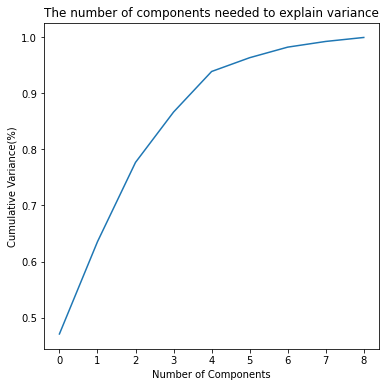

In [23]:

fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance(%)')
plt.title('The number of components needed to explain variance')


plt.show()

#### From the graph it is clear that we can use 6 components.

In [24]:
#doing PCA
pca=PCA(n_components = 6)
pca.fit(data_new)
x_pca = pca.transform(data_new)
x_pca.shape

(128, 6)

#### from 10 columns, it reduced to 6 columns

In [25]:

x_pca=pd.DataFrame(data = x_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.319094,0.410299,-1.024024,0.932800,0.119716,-0.463580
1,0.896348,0.010309,-0.612730,-1.212767,0.108428,-0.173106
2,0.051751,-1.562541,1.062569,-0.615400,0.623418,-0.290561
3,-3.283513,-0.367000,2.926348,1.566965,0.266134,-0.234122
4,2.061154,0.476694,0.099626,-0.154815,-0.596287,-0.445734


### WCSS

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

1110.3708503436158
731.4123445232888
592.2663356256515
503.05570151663704
457.9244687539635
416.56772403427806
378.7371085413902
359.25148537664916
329.75021793029657
297.9360098387443


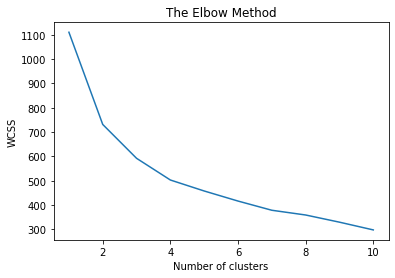

In [27]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Optimum number of clusters is 4 as per the Elbow Method

### Applying the model

In [28]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_pca)
y_kmeans

array([2, 3, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 2, 3, 1, 3, 3, 1, 3, 2,
       2, 3, 2, 3, 0, 1, 1, 2, 2, 2, 3, 2, 0, 0, 0, 1, 1, 1, 3, 2, 0, 3,
       1, 2, 3, 2, 0, 3, 1, 2, 2, 3, 0, 1, 1, 1, 1, 0, 1, 3, 1, 2, 3, 3,
       2, 0, 3, 2, 0, 0, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 1, 3, 1, 0,
       2, 3, 3, 1, 1, 0, 0, 1, 1, 2, 3, 0, 2, 3, 0, 0, 3, 2, 0, 0, 1, 3,
       2, 3, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 1, 1, 3, 3, 2, 2])

### Checking the efficiency of the model using evaluation metric

In [29]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(data_new,y_kmeans)
print(silhouette_kmeans)

0.2216034150804669


In [30]:
data_new['cluster'] = y_kmeans

In [31]:
data_new['cluster'].value_counts()

3    41
2    34
1    30
0    23
Name: cluster, dtype: int64

In [32]:
data_new.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'cluster'],
      dtype='object')

In [33]:
data_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561,2
1,-0.656174,-0.503559,0.092995,0.196191,-0.125286,-0.465551,0.895099,-0.938772,-0.328385,3
2,-0.339899,0.051955,-0.986655,-0.775465,0.179750,1.431138,0.922200,-0.089565,-0.276376,1
3,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101,2
4,-0.842392,0.431200,-0.142895,0.778055,0.816525,-0.963819,0.962853,-0.610047,0.811593,0


### Agglomerative Hierarchical Clustering

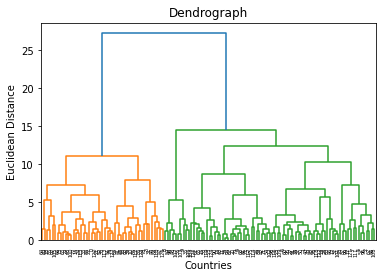

In [34]:
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(x_pca,method = 'ward'))#creating instance of dendrogram using x with ward method.ward method is used to take the distance between two clusters.
plt.title('Dendrograph')
plt.xlabel('Countries')

plt.ylabel('Euclidean Distance')

plt.show()

### Optimum number of clusters is 2

### Fitting Agglomerative Clustering model

In [35]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters= 2,affinity='euclidean', linkage ='ward')# creating an instance hc for agglomeartive clustering with no of clusters is 5,again taking ecludean distance as ward method.
y_hc = hc.fit_predict(x_pca)#fitting it to clustering

In [36]:
y_hc

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### Evaluating the model

In [37]:
silhouette_hc = silhouette_score(x_pca,y_hc)
print(silhouette_hc)

0.2941138543659331


### Comparing Kmeans model and Agglomerative Clustering model

* Model efficiency of Kmeans is 0.309750328518616
* Model efficiency of Agglomerative Clustering is 0.2941138543659331
* As the efficiency is seen more for KMeans model, we are considering the clusters of KMeans.

### Scatter plot between variables  

<AxesSubplot:xlabel='income', ylabel='gdpp'>

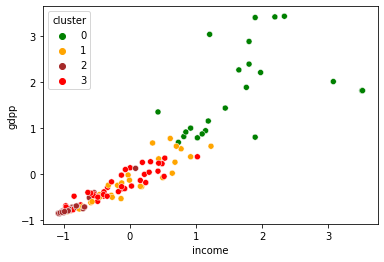

In [38]:
sns.scatterplot(x='income',y='gdpp',hue='cluster',legend='full',data=data_new,palette=['green','orange','brown','red'])


<AxesSubplot:xlabel='child_mort', ylabel='health'>

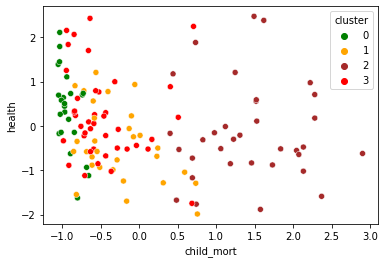

In [39]:
sns.scatterplot(x='child_mort',y='health',hue='cluster',legend='full',data=data_new,palette=['green','orange','brown','red'])

<AxesSubplot:xlabel='health', ylabel='income'>

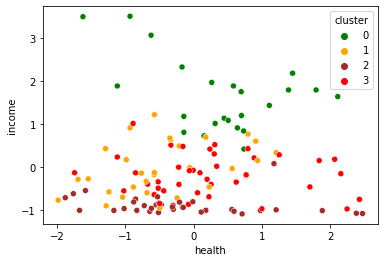

In [40]:
sns.scatterplot(x='health',y='income',hue='cluster',legend='full',data=data_new,palette=['green','orange','brown','red'])

<AxesSubplot:xlabel='health', ylabel='gdpp'>

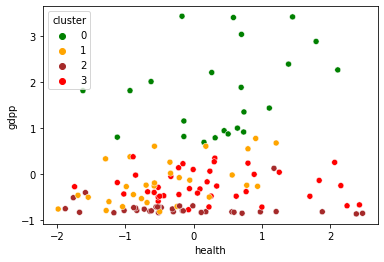

In [41]:
sns.scatterplot(x='health',y='gdpp',hue='cluster',legend='full',data=data_new,palette=['green','orange','brown','red'])

<AxesSubplot:xlabel='health', ylabel='life_expec'>

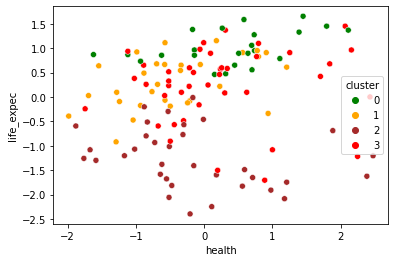

In [42]:
sns.scatterplot(x='health',y='life_expec',hue='cluster',legend='full',data=data_new,palette=['green','orange','brown','red'])


### Analysis of the clusters:

#### Cluster 2
    * It has highest child mortality.
    * Lowest income.
    * Lowest gdpp.
    * Comparitvely low life expectancy.

In [43]:
cluster_second=data_new[data_new['cluster']==2]
cluster_second.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561,2
3,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101,2
14,2.134141,-0.727902,-1.018410,-0.447814,-0.958228,-1.054488,-1.069778,1.602002,-0.796746,2
21,2.281933,-0.973610,0.179186,-0.877150,-0.998284,-0.086540,-1.598262,1.951273,-0.822469,2
22,1.619824,-1.522714,2.383850,-0.334830,-1.066686,0.810344,-1.625363,2.218362,-0.870823,2


In [44]:
country_data = data['country']
country_data

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
161             Uzbekistan
162                Vanuatu
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 128, dtype: object

In [45]:
data_new = data_new.join(country_data)

In [46]:
data_new.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'cluster', 'country'],
      dtype='object')

In [47]:
data_new[data_new.cluster == 2].shape

(34, 11)

In [67]:

country_help=data_new[data_new.cluster == 2].country
country_help

0             Afghanistan
3                  Angola
14                Belarus
21               Botswana
22                 Brazil
24               Bulgaria
30             Cape Verde
33                  Chile
41                Croatia
45     Dominican Republic
47                  Egypt
51                Estonia
52                   Fiji
63                 Guinea
69                  India
74                 Israel
78                 Jordan
83        Kyrgyz Republic
88                Liberia
97                   Mali
100             Mauritius
105               Morocco
115                  Oman
120           Philippines
126                Rwanda
127                 Samoa
29                    NaN
31                    NaN
66                    NaN
73                    NaN
77                    NaN
110                   NaN
112                   NaN
113                   NaN
Name: country, dtype: object

### Following are the countries which are to be considered in need of help based on socio-economic and health factors:
    
        Afghanistan
        Angola
        Belarus
        Botswana
        Brazil
        Bulgaria
        Cape Verde
        Chile
        Croatia
        Dominican Republic
        Egypt
        Estonia
        Fiji
        Guinea
        India
        Israel
        Jordan
        Kyrgyz Republic
        Liberia
        Mali
        Mauritius
        Morocco
        Oman
        Philippines
        Rwanda
        Samoa